# Part 1 - Warm-up

### Task 1
The first task consists of fitting the following logarithmic equation to a set of 50 (x,y) data points:

$$y = a * \log{(x)} + b$$

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps

- Load and plot the data
- Define a new variable log(x) and transform the data.
- Fit a model to the new data
- Plot the logarithmic curve against the original data (see plot above).
- Compute the RSS and $R^2$ measures.
- Discuss the results, is it a good $R^2$ score?

In [22]:
# import libraries 
import pandas as pd 
import numpy as np 
import numpy.polynomial.polynomial as poly 
import matplotlib.pyplot as plt 
%matplotlib inline

- Load and plot the data

In [23]:
# load data
df = pd.read_csv("p3_task-1.csv")
df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


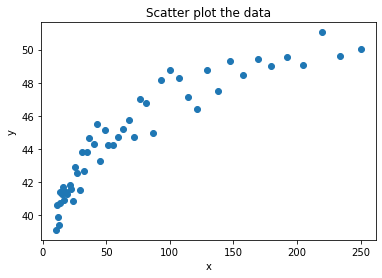

In [24]:
# Plot data
X = df.x
y = df.y

plt.scatter(X, y)
plt.title("Scatter plot the data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

1.  Define a new variable log(x) and transform the data.
2. Fit a model to the new data
3. Plot the logarithmic curve against the original data (see plot above).

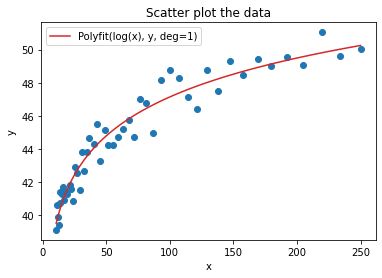

In [25]:
# Setup log(x) variable
log_x = np.log(X)

# Fit polynomial
coefs = poly.polyfit(log_x, y, deg=1)

# Generate a hundred values betwee min(x) and max(x)
x_values = np.linspace(X.min(), X.max(), num=100)

# Predict y values from generated x-values
y_pred = poly.polyval(np.log(x_values), coefs)

# Predict y-values from all the data points
y_pred_values = poly.polyval(log_x, coefs)

# Plot curve
plt.scatter(X, y)
plt.plot(x_values, y_pred, c="C3", label="Polyfit(log(x), y, deg=1)")
plt.title("Scatter plot the data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Compute the RSS and $R^2$ measures.

In [26]:
from sklearn.metrics import r2_score

# Compute RSS
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

print("RSS score: {:.2f}".format(RSS(y, y_pred_values)))
print("R^2 ccore: {:.2f}".format(r2_score(y, y_pred_values)))

RSS score: 31.84
R^2 ccore: 0.94


Discuss the results, is it a good $R^2$ score?
---
The model explains 94% of the variance in the dependent variable. 

The model has 6% where the model doesn't explain the variance.

With the $R^2$ score of 94%, it's a really good score nearly 100%. 


## Task 2
The second task consists of fitting a model to a set of data points that contains outliers. Here are the first five entries

The goal is to build 3 models and compare different approaches to handle outliers:

1. A linear regression to the data with outliers,
2. A huber regression to the data with outliers,
3.A linear regression to the data without outliers.
You should

- Start by using the train/test split methodology (e.g. 80-20 splits) to create a test set and keep it aside.
- Plot the training data to get a quick overview of the data.
- Build and apply a cleaning strategy to remove outliers from the training data.
- Finally compare the test MAE scores for your 3 models and comment.

Note that we don’t remove outliers from the test data. This ensures that we use the same test data each time and thus the evaluations of the models are consistent.

In [27]:
# Load data
df2 = pd.read_csv("p3_task-2.csv")
df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [28]:
from sklearn.model_selection import train_test_split

X2 = df2.iloc[:, :3]
y2 = df2.y

# Splite tarin/test data
X_tr, X_te, y_tr, y_te = train_test_split(X2, y2, test_size=0.2, random_state=0)

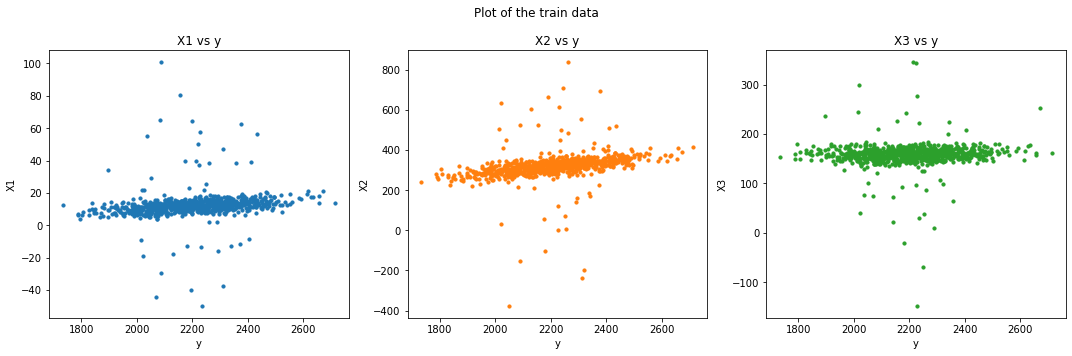

In [29]:
# Plot the data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for n, ax in zip(range(3), axes.ravel()):
    ax.scatter(y_tr, X_tr.iloc[:, n:n +1], c="C" + str(n), s=10)
    ax.set(
        xlabel="y",
        ylabel="X" + str(n + 1),
        title="X" + str(n + 1) + " vs y"  
    )

plt.suptitle("Plot of the train data")
plt.tight_layout()
plt.show()

#### Removing outliers that fall outside of the specified range of values.

In [30]:
print("X_tr with outliers shape:", X_tr.shape)
print("y_tr with outliers shape:", y_tr.shape)

X_tr with outliers shape: (800, 3)
y_tr with outliers shape: (800,)


In [31]:
# Reset index
X_tr2, y_tr2 = X_tr.reset_index(drop=True), y_tr.reset_index(drop=True)

# Set range 
range_values = {
    "x1": [0, 20],
    "x2": [200, 400],
    "x3": [100, 200]
} 

# Remove outlier according to the range set
for col in range_values:
    # Get range numbers
    num = range_values.get(col)
    # locate values that are in the range
    mask = X_tr2[col].between(num[0], num[1])
    # Drop values outide the sepecifide range
    X_tr2 = X_tr2.drop(mask.loc[~mask].index)
    y_tr2 = y_tr2.drop(mask.loc[~mask].index)

print("New X_tr without outliers shape:", X_tr2.shape)
print("New y_tr without outliers shape:", y_tr2.shape)

New X_tr without outliers shape: (746, 3)
New y_tr without outliers shape: (746,)


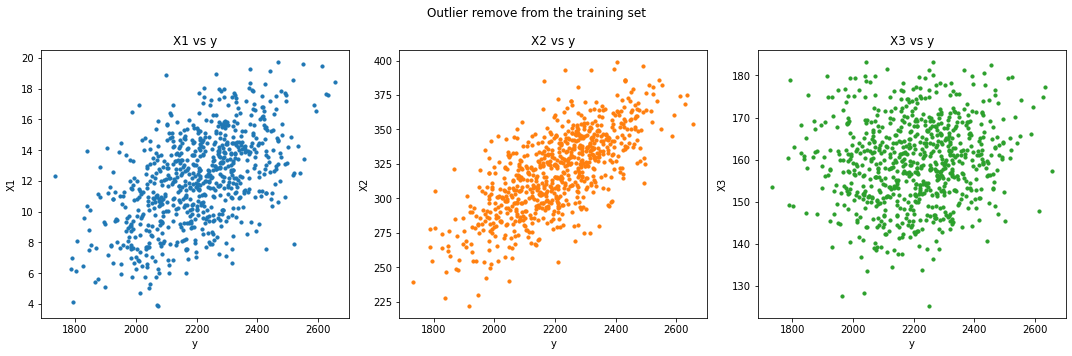

In [32]:
# Plot the data without outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for n, ax in zip(range(3), axes.ravel()):
    ax.scatter(y_tr2, X_tr2.iloc[:, n:n +1], c="C" + str(n), s=10)
    ax.set(
        xlabel="y",
        ylabel="X" + str(n + 1),
        title="X" + str(n + 1) + " vs y"  
    )

plt.suptitle("Outlier remove from the training set")
plt.tight_layout()
plt.show()

# Fit models

In [33]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression, HuberRegressor

# Setup each regression
lr =  LinearRegression()
huber = HuberRegressor()
lr2 = LinearRegression()

# Fit 
lr.fit(X_tr, y_tr)
huber.fit(X_tr, y_tr)
lr2.fit(X_tr2, y_tr2)

# Display the results
print("MAE for linear regression with outliers: {:.3f}".format(MAE(y_te, lr.predict(X_te))))
print("MAE for Huber regression with outliers: {:.3f}".format(MAE(y_te, huber.predict(X_te))))
print("MAE for linear regression without outliers: {:.3f}".format(MAE(y_te, lr2.predict(X_te))))

MAE for linear regression with outliers: 104.788
MAE for Huber regression with outliers: 83.908
MAE for linear regression without outliers: 70.616


Removing outliers from the training data improves the performance of the Linear regression models. We see an increase when using the row data and fitting a linear regression to it. The last two regressions perform better.